In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import os
import sys
from pathlib import Path
ROOT_DIR = os.path.abspath(os.path.join(Path().absolute(), os.pardir))
sys.path.insert(1, ROOT_DIR)

In [4]:
from glob import glob
import numpy as np
import scipy
import matplotlib.pyplot as plt
from frequency_response import FrequencyResponse

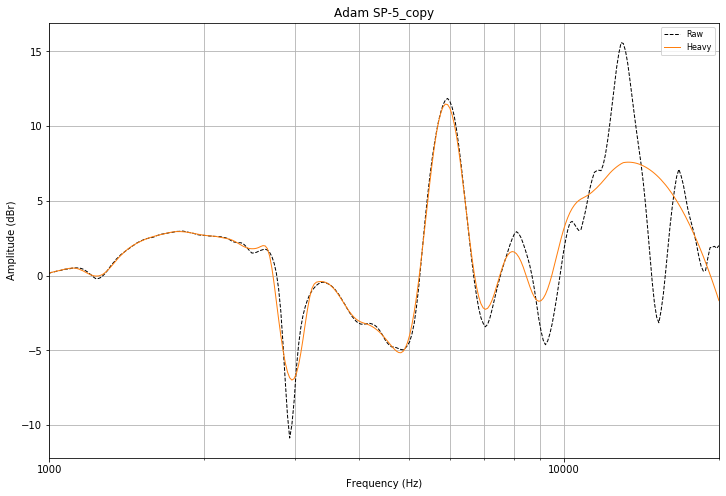

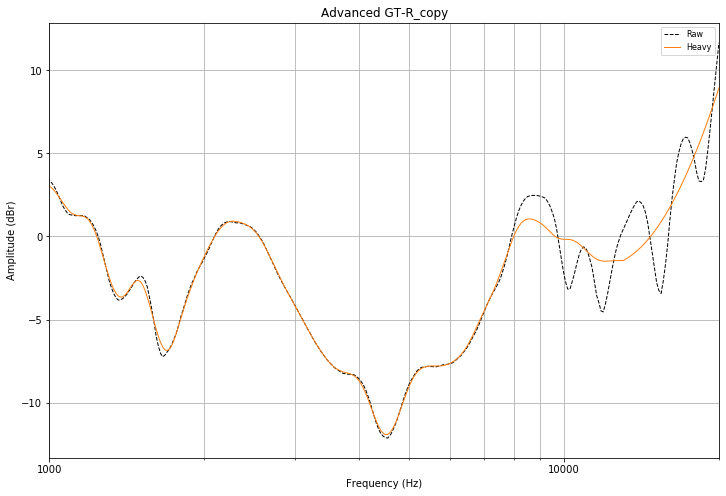

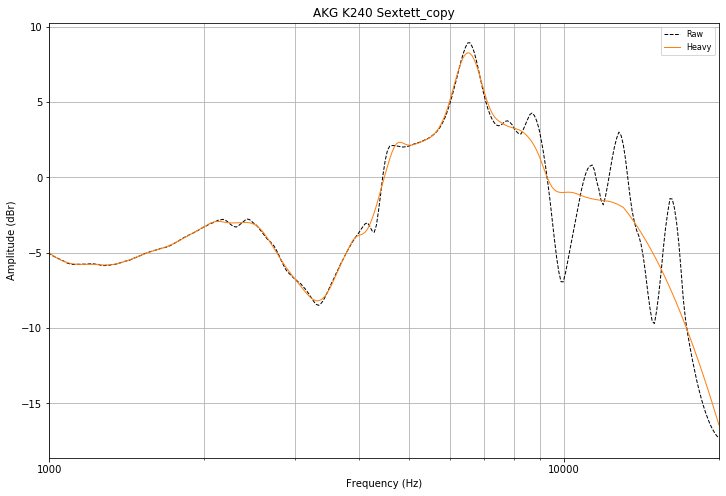

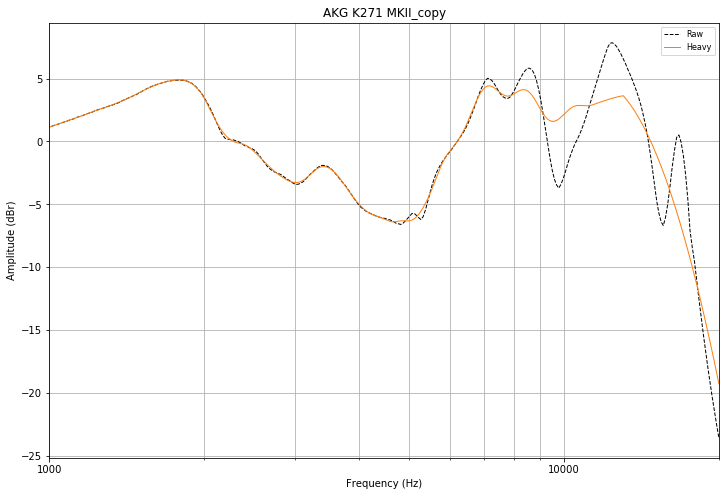

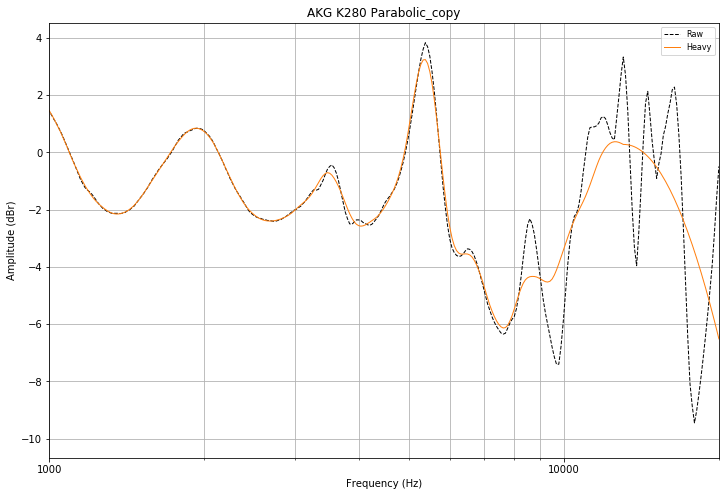

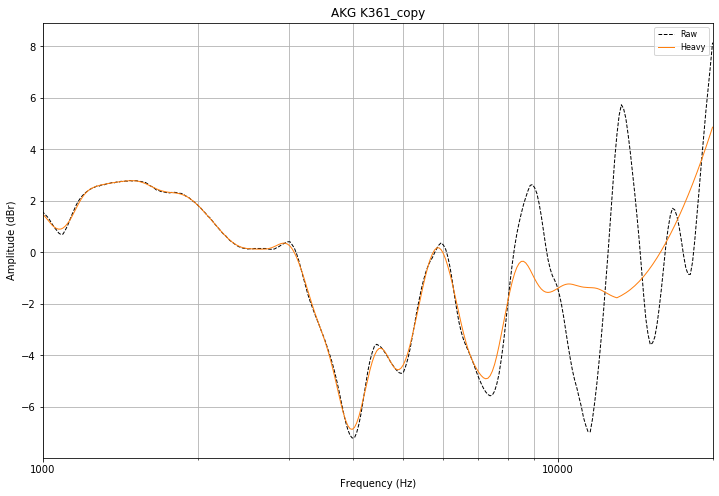

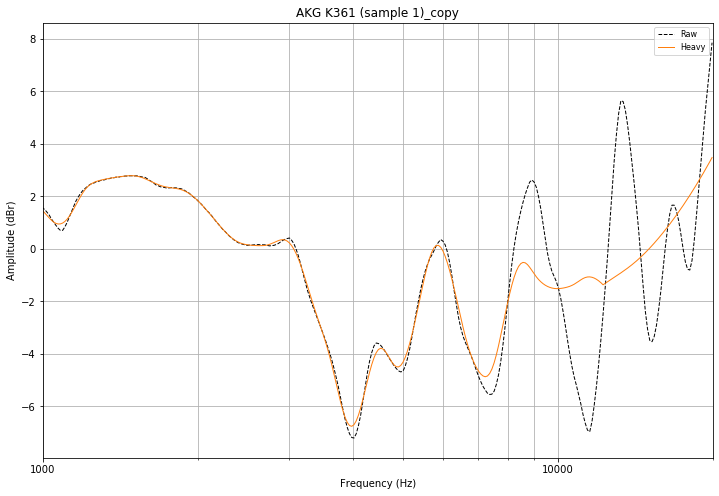

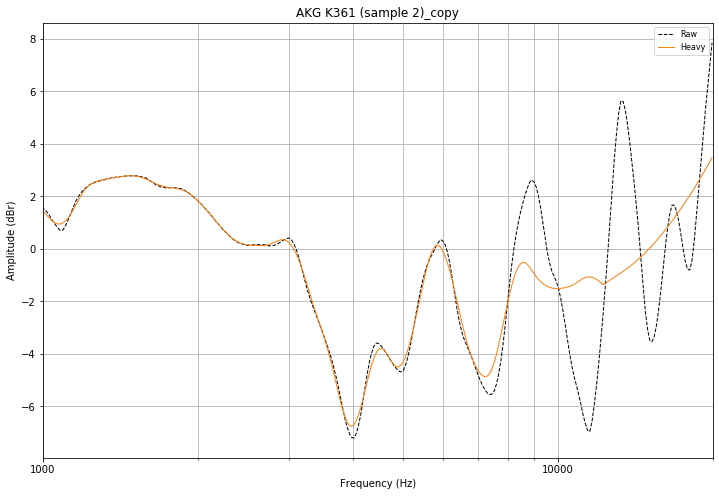

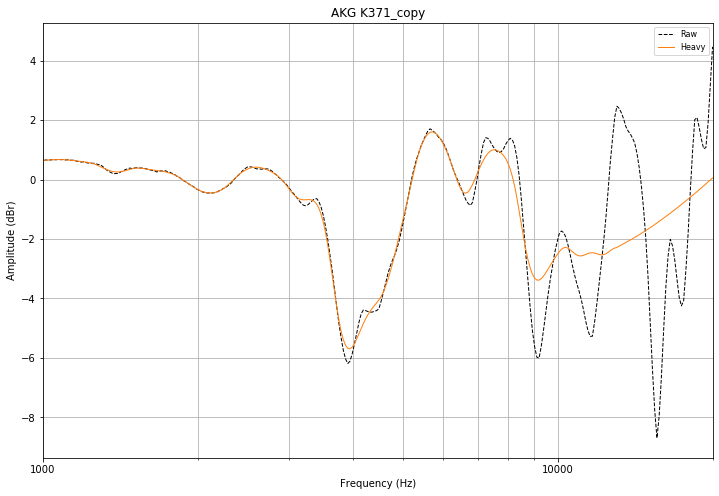

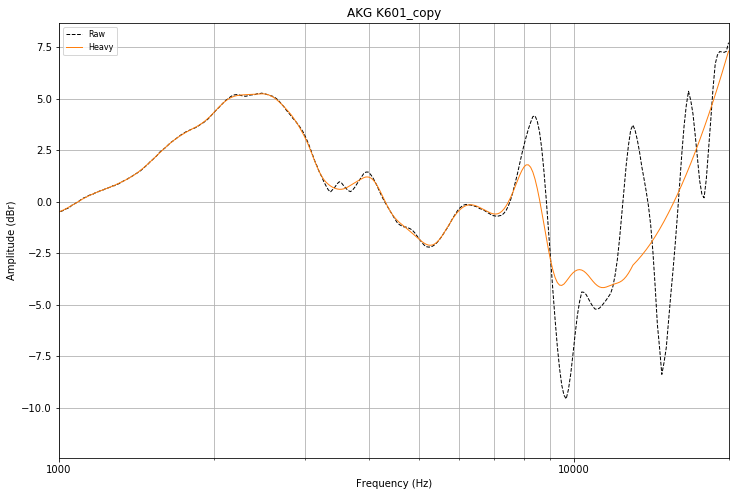

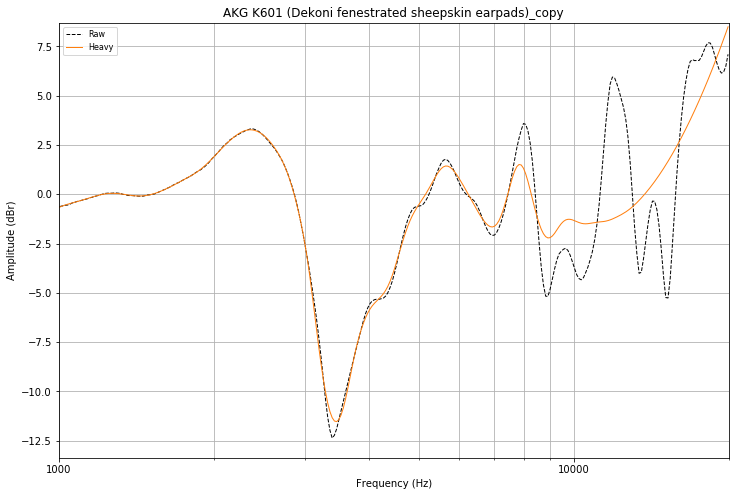

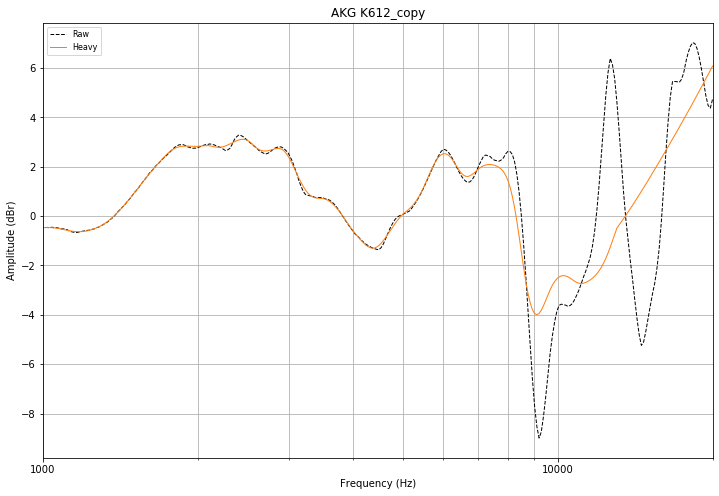

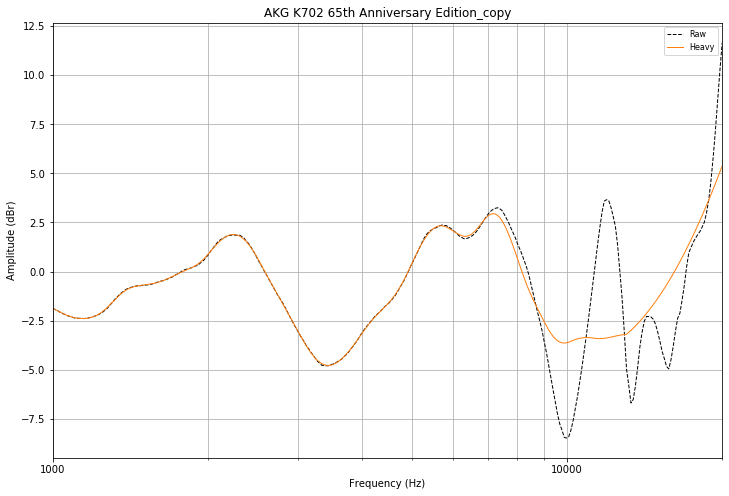

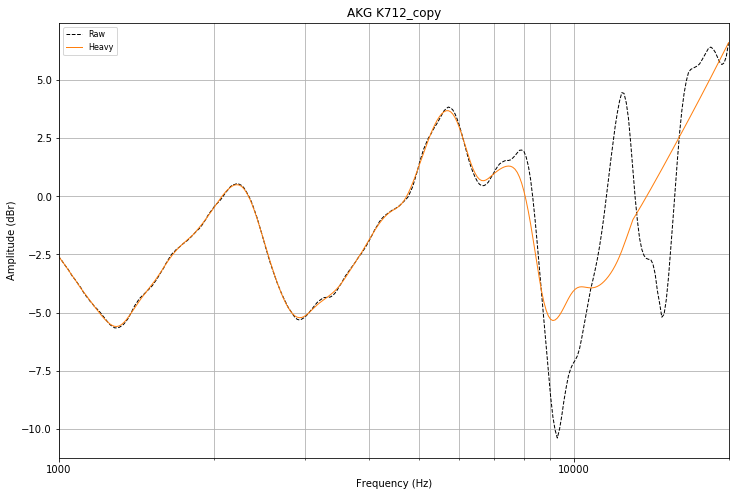

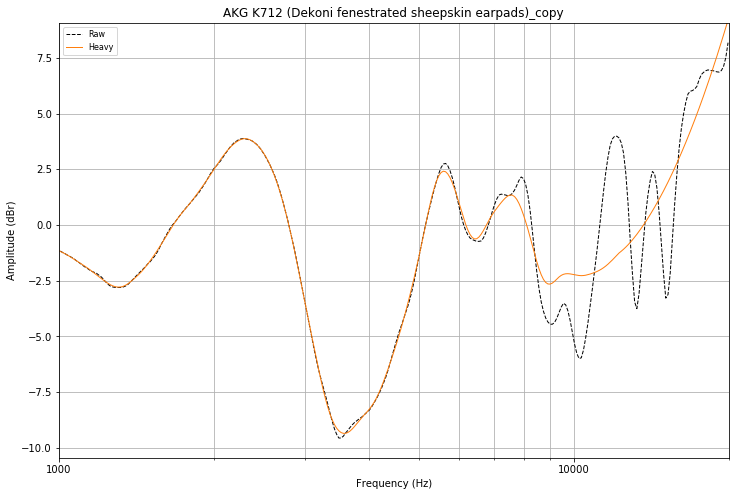

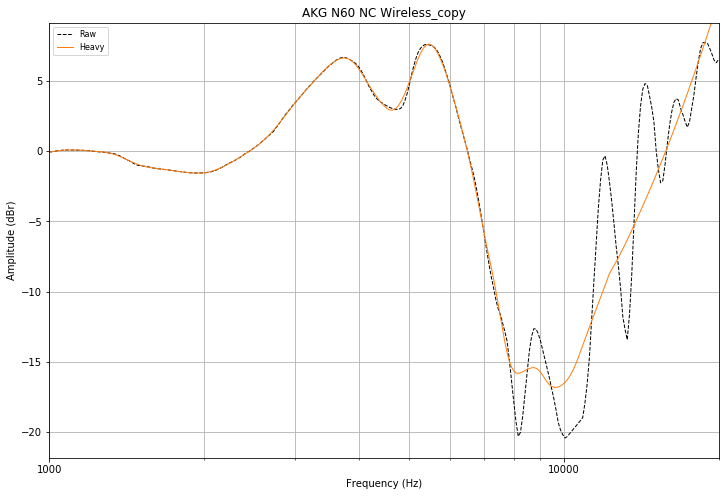

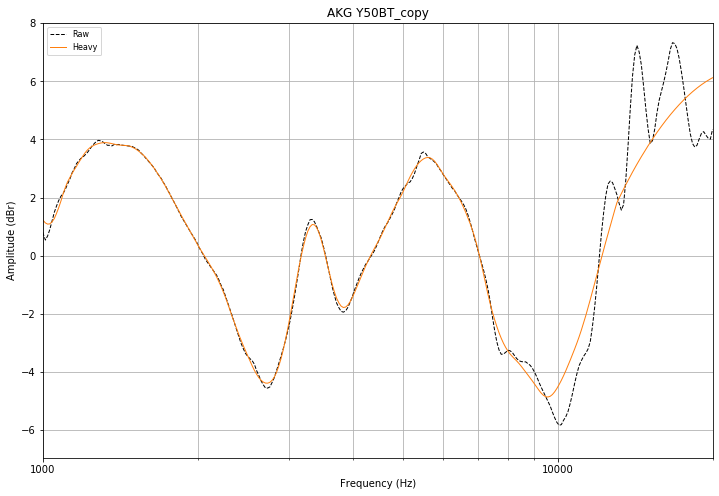

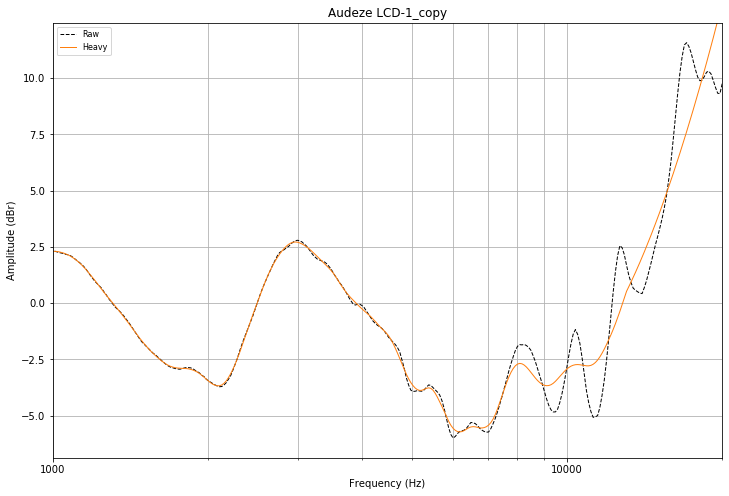

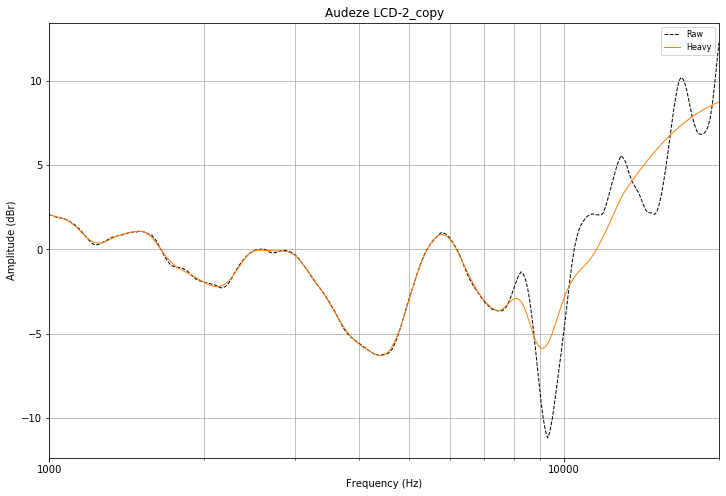

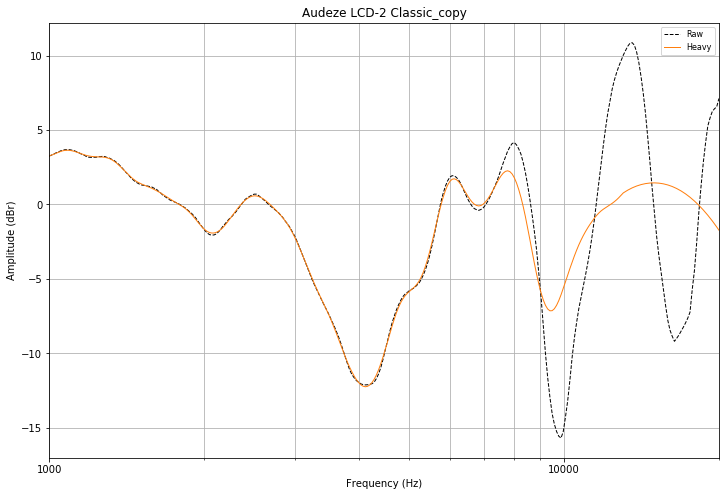

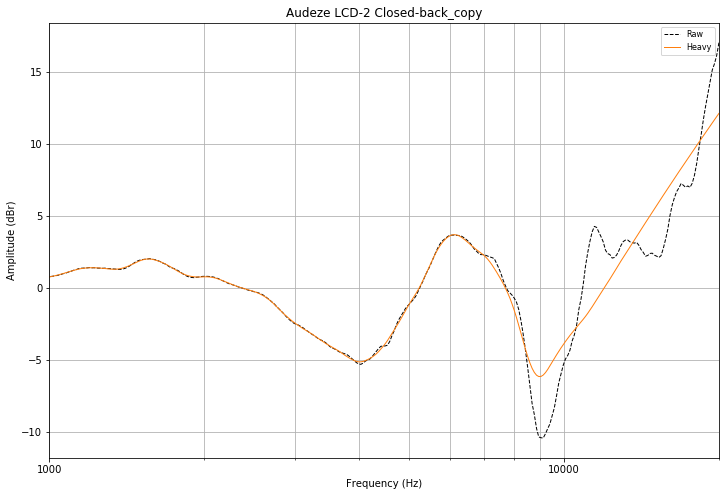

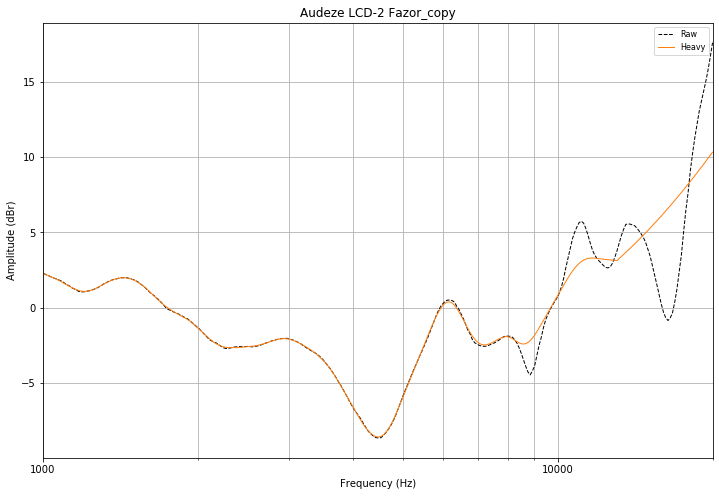

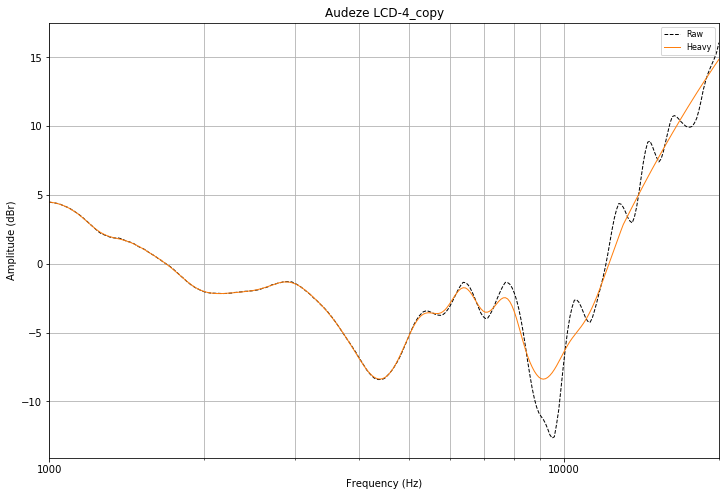

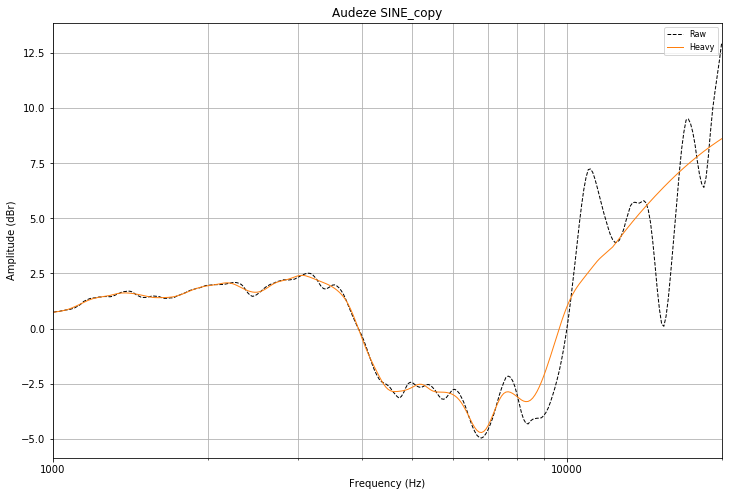

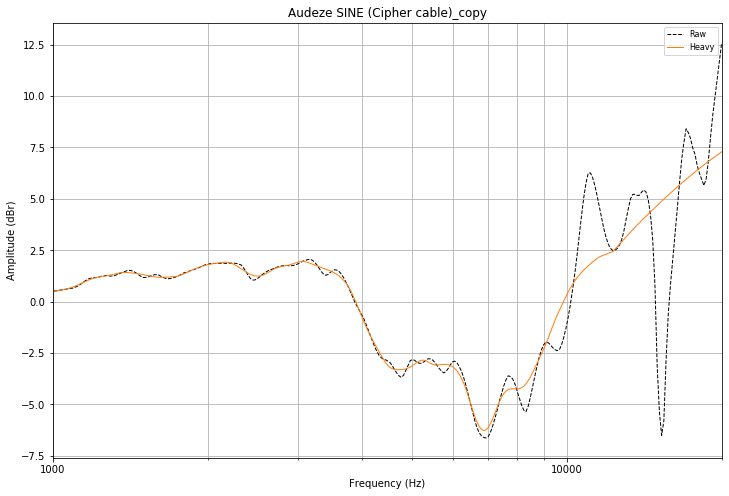

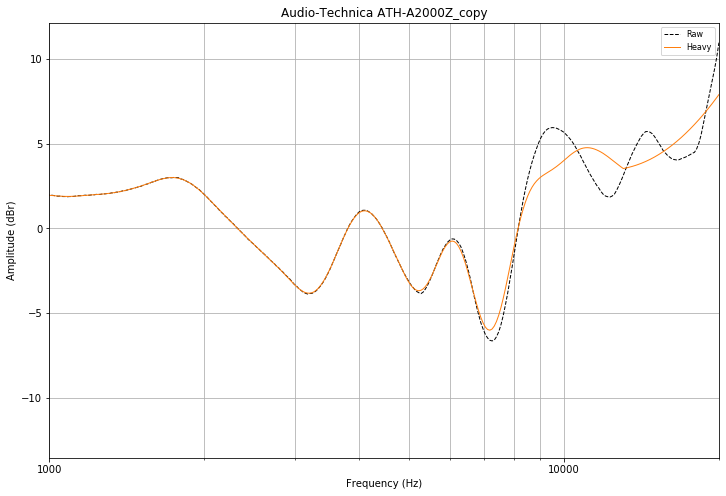

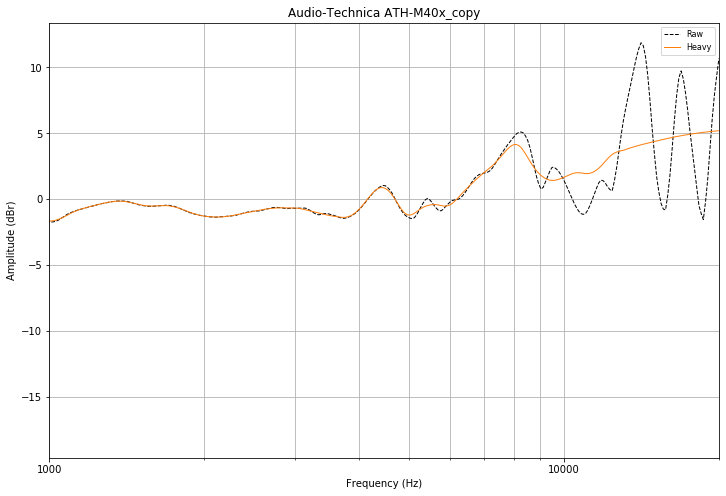

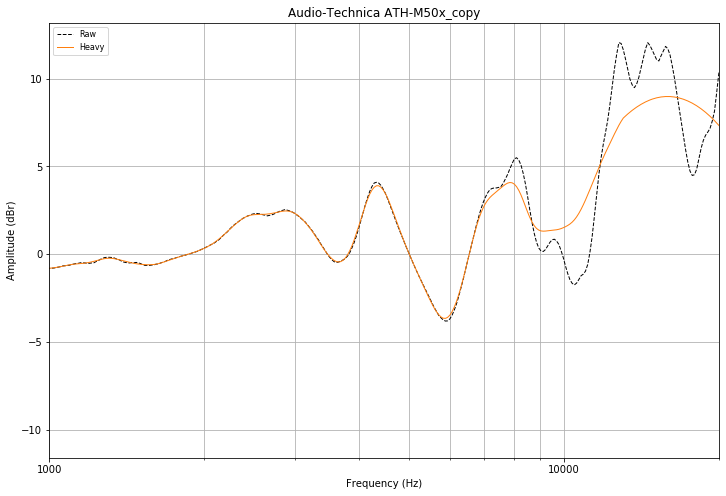

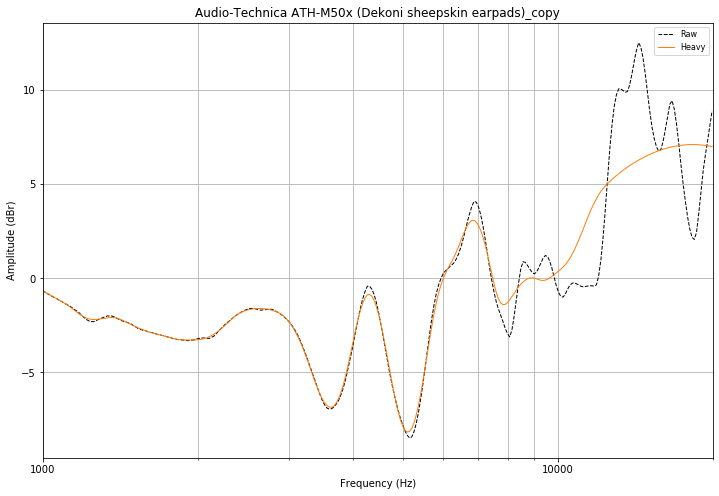

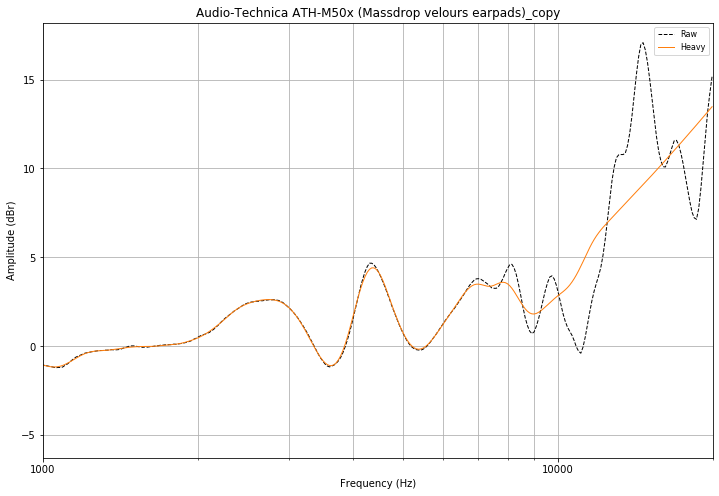

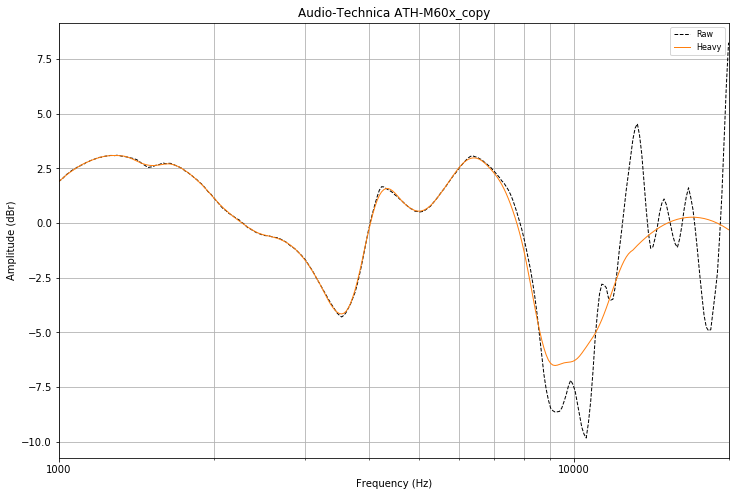

In [5]:
i = 0
for fp in glob(os.path.join(ROOT_DIR, 'results', 'oratory1990', 'harman_over-ear_2018', '*', '*.csv')):
    fr = FrequencyResponse.read_from_csv(fp)
    fr.raw = fr.error.copy()
    fr.reset()
    #fr.raw *= -1
    fr.smoothen_heavy_light()
    heavy = fr.copy()
    heavy.smoothen_fractional_octave(window_size=1/3, treble_window_size=1.4, treble_f_lower=6000, treble_f_upper=12000)
    light = fr.copy()
    light.smoothen_fractional_octave(window_size=1/3, treble_window_size=1/3)

    fig, ax = fr.plot_graph(
        show=False, smoothed=False, raw_plot_kwargs={'label': 'Raw', 'color': 'black', 'linestyle': '--'},
        smoothed_plot_kwargs={'label': 'Heavy light', 'color': 'C0', 'linewidth': 1})
    heavy.plot_graph(fig=fig, ax=ax, show=False, raw=False, smoothed_plot_kwargs={'label': 'Heavy', 'color': 'C1', 'linewidth': 1})
    #light.plot_graph(fig=fig, ax=ax, show=False, raw=False, smoothed_plot_kwargs={'label': 'Light', 'color': 'C2', 'linestyle': '--', 'linewidth': 1})
    ax.set_xlim([1000, 20000])
    plt.show()
    plt.close(fig)
    if i > 29:
        break
    i += 1

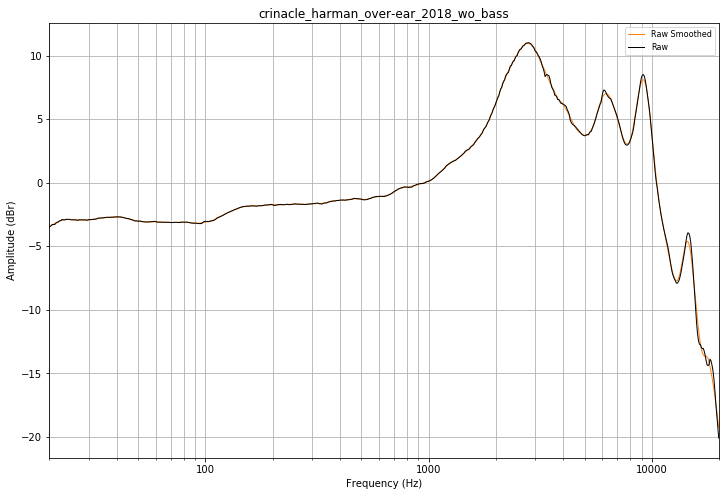

(<Figure size 864x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2732cf8e808>)

In [53]:
fr = FrequencyResponse.read_from_csv(os.path.join(ROOT_DIR, 'research/calibration/crinacle_harman_over-ear_2018_wo_bass.csv'))
fr.smoothen_fractional_octave(window_size=1/3, treble_window_size=1/3)
fr.plot_graph(smoothed_plot_kwargs={'linewidth': 1, 'color': 'C1'})